In [1]:
import pandas as pd

In [2]:
df=pd.read_excel(r"C:\Users\TUSHAR\OneDrive\Documents\Book167.xlsx")

In [3]:
df.head()

,name,age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

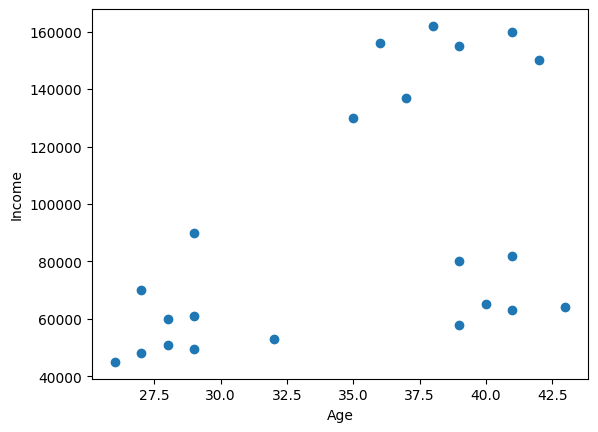

In [5]:
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(df['age'],df['Income($)'])


In [6]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['age','Income($)']])
y_predicted

C:\Users\TUSHAR\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['clusters']=y_predicted

In [8]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


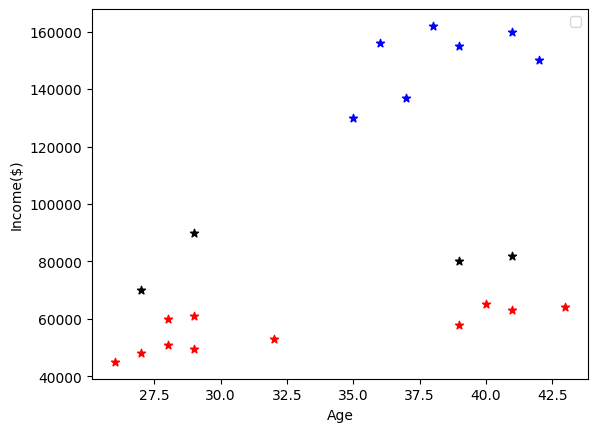

In [9]:
df1=df[df['clusters']==0]
df2=df[df['clusters']==1]
df3=df[df['clusters']==2]
plt.scatter(df1.age,df1['Income($)'],color='red',marker='*')
plt.scatter(df2.age,df2['Income($)'],color='blue',marker='*')
plt.scatter(df3.age,df3['Income($)'],color='black',marker='*',)
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [10]:
scaler=MinMaxScaler()
scaler.fit(df[['age']])
df['age']=scaler.transform(df[['age']])
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df.head()

,name,age,Income($),clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


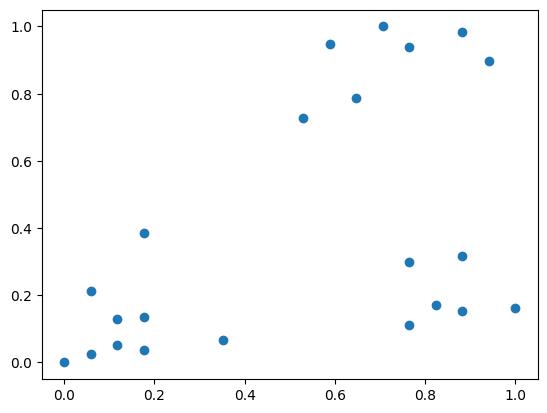

In [14]:
plt.scatter(df.age,df['Income($)'])

In [19]:
km=KMeans(n_clusters=3)
df['clusters']=km.fit_predict(df[['age','Income($)']])

C:\Users\TUSHAR\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

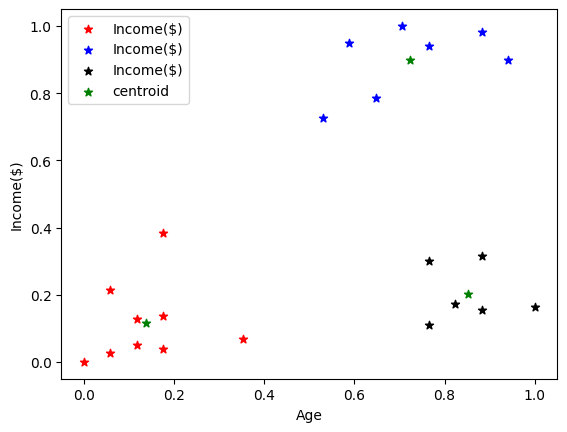

In [24]:
df1=df[df['clusters']==0]
df2=df[df['clusters']==1]
df3=df[df['clusters']==2]
plt.scatter(df1.age,df1['Income($)'],color='red',marker='*',label='Income($)')
plt.scatter(df2.age,df2['Income($)'],color='blue',marker='*',label='Income($)')
plt.scatter(df3.age,df3['Income($)'],color='black',marker='*',label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='green',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [26]:
sse=[]
k_rng=range(1,10)
for i in k_rng:
    km=KMeans(n_clusters=i)
    km.fit(df[['age','Income($)']])
    sse.append(km.inertia_)

C:\Users\TUSHAR\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TUSHAR\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TUSHAR\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TUSHAR\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The 

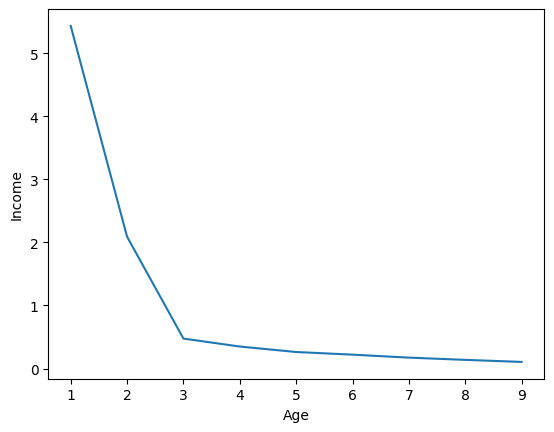

In [30]:
plt.xlabel('Age')
plt.ylabel('Income')
plt.plot(k_rng,sse)